In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path


In [2]:
# Setting root

project_root = Path().resolve().parent
sys.path.append(str(project_root))

cycling_path = project_root / "data" / "aggregated_datasets" / "aggregated_fietsen.csv"


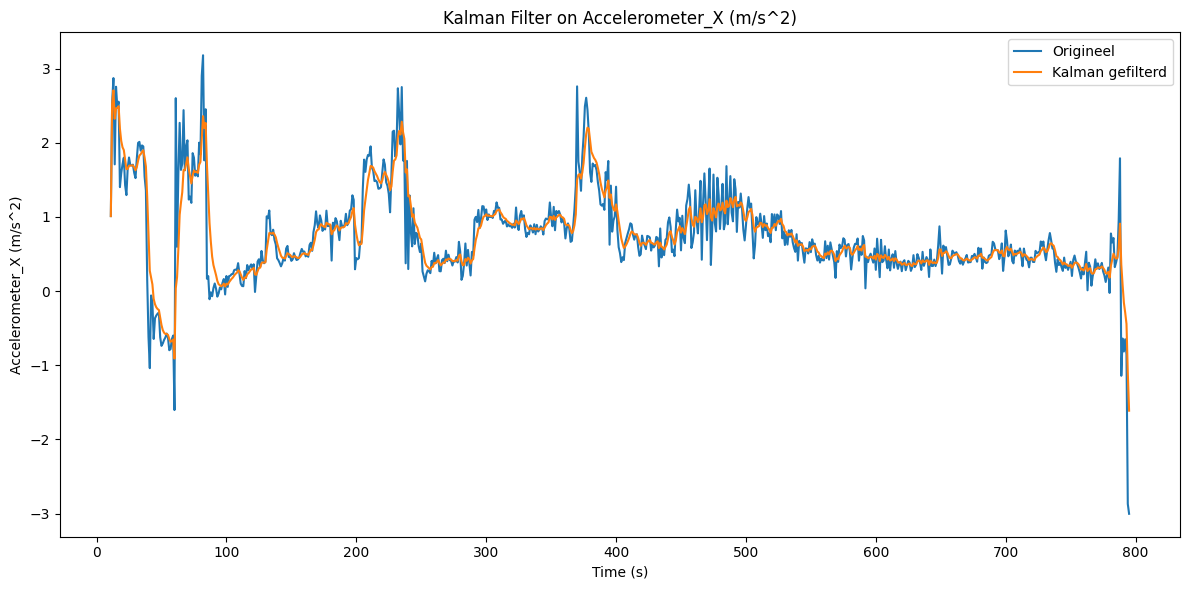

In [3]:
from src.preprocessing.remove_noise import apply_kalman_filter

# read csv
df = pd.read_csv(cycling_path)

# choose column
sensor_col = 'Accelerometer_X (m/s^2)'

# apply kalman
df[f'{sensor_col}_kalman'] = apply_kalman_filter(df[sensor_col])

# Plotten van origineel vs gefilterd
plt.figure(figsize=(12,6))
plt.plot(df['Time (s)'], df[sensor_col], label='Origineel')
plt.plot(df['Time (s)'], df[f'{sensor_col}_kalman'], label='Kalman gefilterd')
plt.xlabel('Time (s)')
plt.ylabel(sensor_col)
plt.title(f'Kalman Filter on {sensor_col}')
plt.legend()
plt.tight_layout()
plt.show()

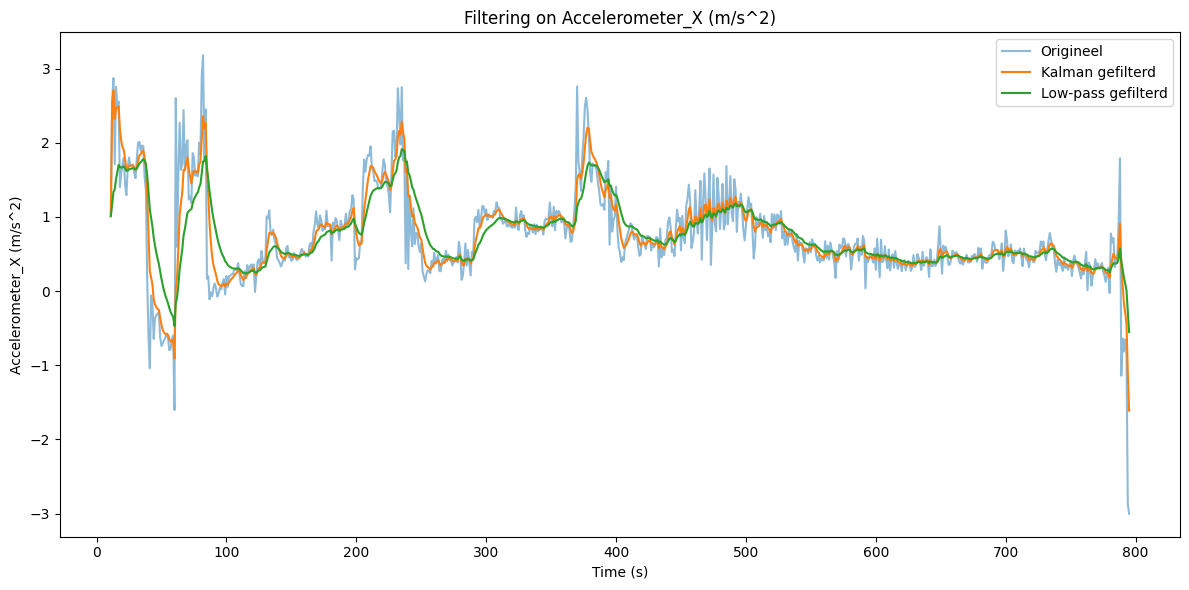

In [4]:
from src.preprocessing.remove_noise import apply_lowpass_filter 

# apply low-pass filter
df[f'{sensor_col}_lowpass'] = apply_lowpass_filter(df[sensor_col], alpha=0.1)

# Plotten van origineel vs Kalman vs Low-pass
plt.figure(figsize=(12,6))
plt.plot(df['Time (s)'], df[sensor_col], label='Origineel', alpha=0.5)
plt.plot(df['Time (s)'], df[f'{sensor_col}_kalman'], label='Kalman gefilterd')
plt.plot(df['Time (s)'], df[f'{sensor_col}_lowpass'], label='Low-pass gefilterd')
plt.xlabel('Time (s)')
plt.ylabel(sensor_col)
plt.title(f'Filtering on {sensor_col}')
plt.legend()
plt.tight_layout()
plt.show()


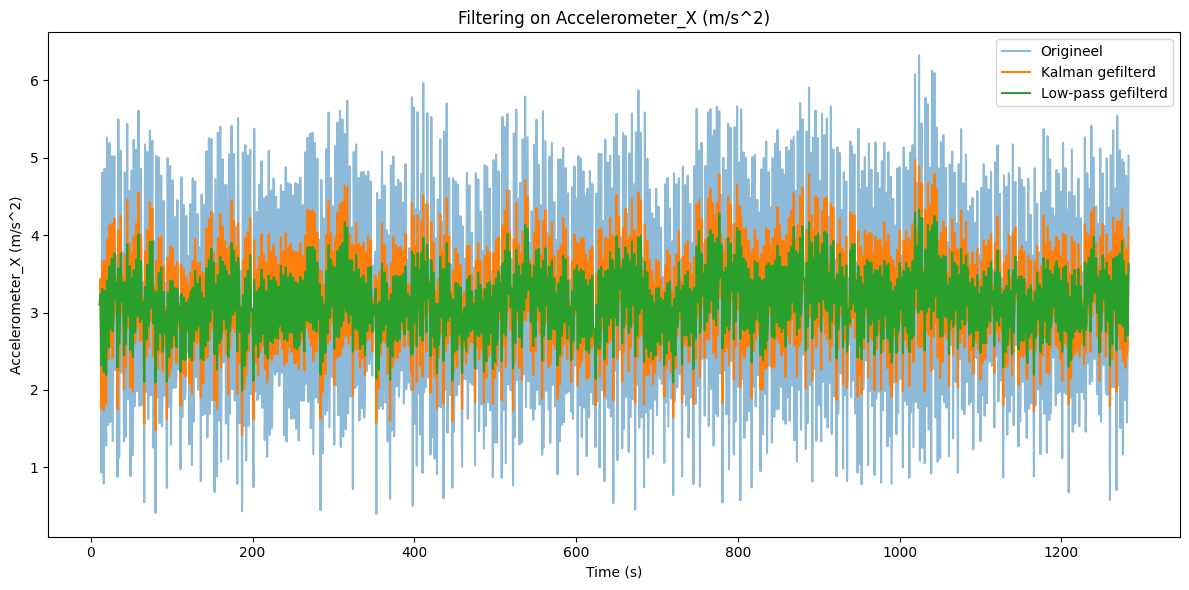

In [23]:
running_path = project_root / "data" / "aggregated_datasets" / "aggregated_rennen.csv"

# read csv
df = pd.read_csv(running_path)

# choose column
sensor_col = 'Accelerometer_X (m/s^2)'

# apply kalman
df[f'{sensor_col}_kalman'] = apply_kalman_filter(df[sensor_col], process_variance=0.002, measurement_variance=0.002)

# apply lowpass
df[f'{sensor_col}_lowpass'] = apply_lowpass_filter(df[sensor_col], alpha=0.4)

# Plotten van origineel vs Kalman vs Low-pass
plt.figure(figsize=(12,6))
plt.plot(df['Time (s)'], df[sensor_col], label='Origineel', alpha=0.5)
plt.plot(df['Time (s)'], df[f'{sensor_col}_kalman'], label='Kalman gefilterd')
plt.plot(df['Time (s)'], df[f'{sensor_col}_lowpass'], label='Low-pass gefilterd')
plt.xlabel('Time (s)')
plt.ylabel(sensor_col)
plt.title(f'Filtering on {sensor_col}')
plt.legend()
plt.tight_layout()
plt.show()


In [22]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse_kalman = np.sqrt(mean_squared_error(df[sensor_col], df[f'{sensor_col}_kalman']))
rmse_lowpass = np.sqrt(mean_squared_error(df[sensor_col], df[f'{sensor_col}_lowpass']))

print(rmse_kalman, rmse_lowpass)


0.7688805074178308 0.7185424623843308
